In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
data=pd.read_csv('PS_log.csv')
df=pd.DataFrame(data)

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Az adathalmaz 11 változót tartalmaz
    Step:Órát jelöli 1-720 ig , ezáltal 1 hónapnyi órát szimulálva [Numerikus]
    Type: 5 féle értéket felvevő változó, ez mutatja meg a tranzakció típusát [Kategorikus]
    Amount: A tranzakció során átutalt pénz értékét határozza meg két tizedesjegy pontosságal [Numerikus] 
    NameOrigin: A tranzakciót indító címet határozza meg [Kategorikus]
    NameDest: A tranzakció célcímét határozza meg [Kategorikus]
    BalanceOrigin:A taranzakciót végrahajtó eredeti egyenlege, majd a tranzakciót követően
    BalanceDest:A taranzakciót célzó eredeti egyenlege, majd a tranzakciót követően
    isFraud: A tranzakció valóban csalás volt e    
        

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


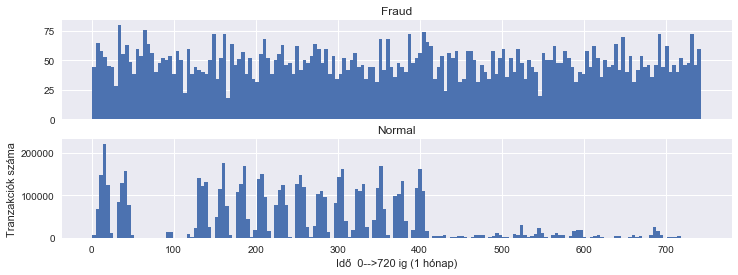

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 168

ax1.hist(df.step[df.isFraud == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.step[df.isFraud == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Idő  0-->720 ig (1 hónap)')
plt.ylabel('Tranzakciók száma')
plt.show()

Érdekes megfigyelni , hogy 50.-100. óra között szinte nincs is tranzakció. Valamint a periodicitást is.

In [13]:
def create_boxplot(df,column):    
    sub_df = df.groupby([column])[column].count()
    sub_df.plot(kind='bar')
    
    plt.show()

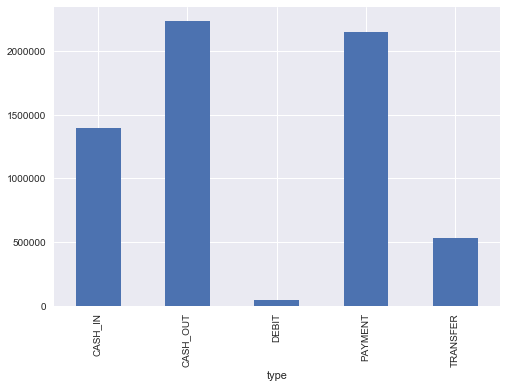

In [14]:
create_boxplot(df,'type')

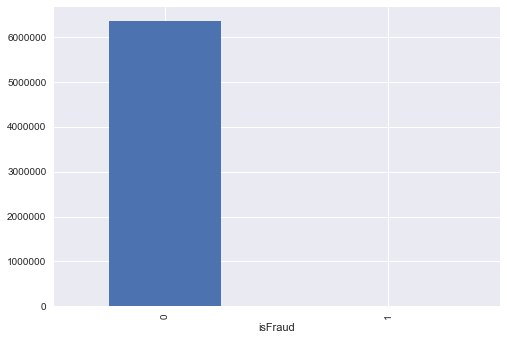

In [15]:
create_boxplot(df,'isFraud')

A Csalást elkövető tranzakciók száma: 8213

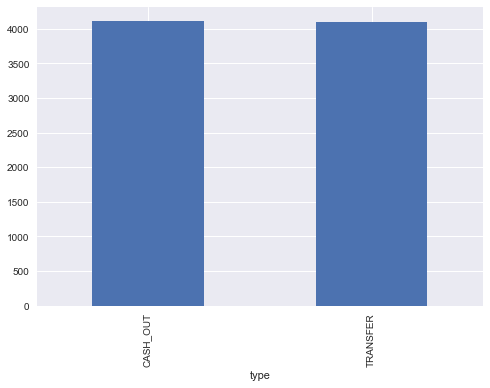

In [24]:

        
sub_df2 = df[df.isFraud == 1].groupby(['type'])['step'].count()
sub_df2.plot(kind='bar')
plt.show()

A csalások csak a Cash_out és a Transfer  tranzakciókban történtek, ezek a típusok száma megegyezik

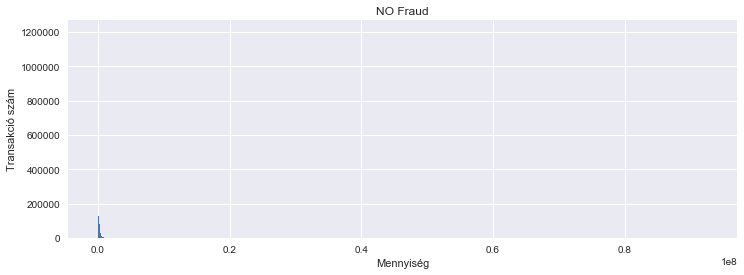

In [55]:

f,  ax2 = plt.subplots( figsize=(12,4))
bins = 10000

ax2.hist(df.amount[df.isFraud == 0], bins = bins)
ax2.set_title('NO Fraud')

plt.xlabel('Mennyiség')
plt.ylabel('Transakció szám')

plt.show()

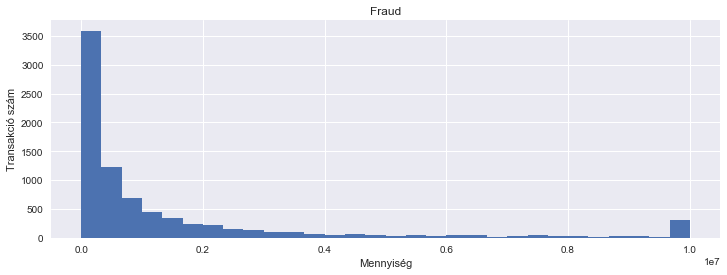

In [26]:
f,  ax2 = plt.subplots( figsize=(12,4))
bins =30

ax2.hist(df.amount[df.isFraud == 1], bins = bins)
ax2.set_title('Fraud')

plt.xlabel('Mennyiség')
plt.ylabel('Transakció szám')

plt.show()

In [27]:
def addhour(df):
    df['hour']=df.step%24
    return df.hour
    
    

In [28]:
def addweekday(df):
    df['day']=((df.step/24))
    df['day'] = df['day'].apply(lambda x: math.trunc(x))
    return df.day
    

In [29]:
df['hour']=addhour(df)
df['day']=addweekday(df)

Egy -egy oszlopba elhelyeztem, hogy az adott tranzakció egy nap hányadik órájában történt , valamint  a hét hányadik napjain

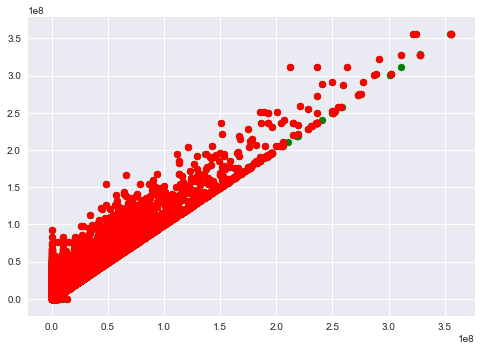

In [30]:
def create_scatterplot(df,x,y,df2):
    
    plt.scatter(df2[x],df2[y],color='green')
    plt.scatter(df[x],df[y],color='red')
    plt.show()
create_scatterplot(df.loc[df['isFraud'] == 1 & df['type'].isin(['TRANSACTION','CASH_OUT'])],'oldbalanceDest','newbalanceDest',df.loc[df['isFraud'] == 0 &df['type'].isin(['TRANSACTION','CASH_OUT'])])    

In [32]:
#create_scatterplot(df.loc[df['isFraud'] == 1 & df['type'].isin(['TRANSACTION','CASH_OUT'])],'oldbalanceDest','newbalanceDest',df.loc[df['isFraud'] == 0 &df['type'].isin(['TRANSACTION','CASH_OUT'])])

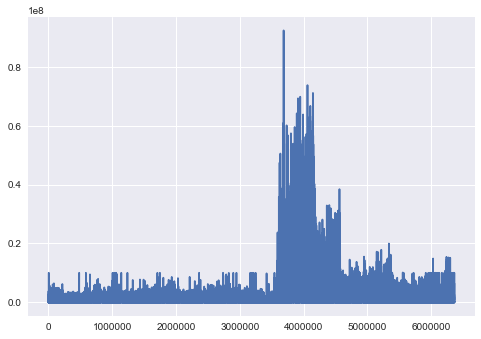

In [31]:
def create_amount_plot_normal(df):
    plt.plot(df['amount'])
    plt.show()
create_amount_plot_normal(df)    

In [1]:
#df.drop(df['amount'].idxmax())

In [33]:
#create_amount_plot_normal(df)

In [47]:
colplot_features =['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','hour','day']

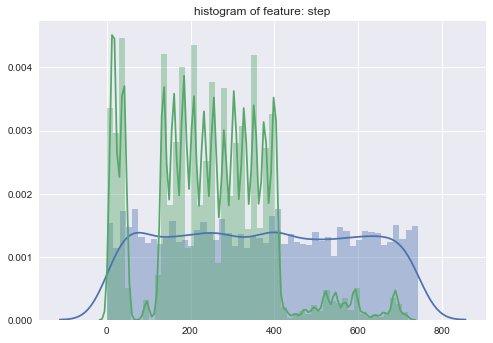

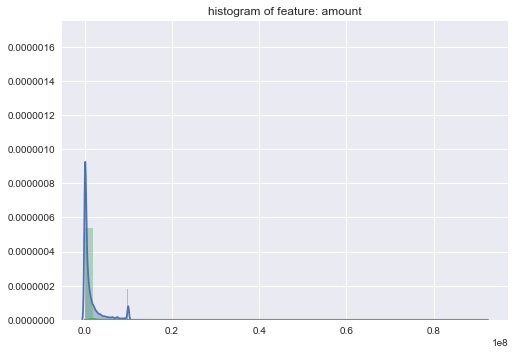

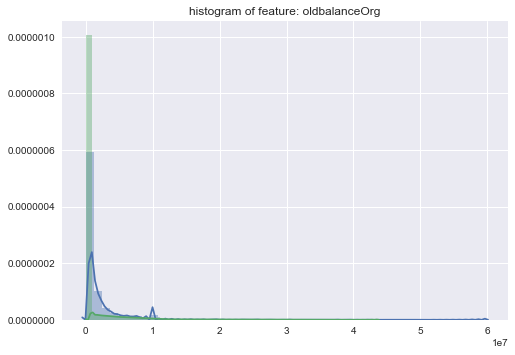

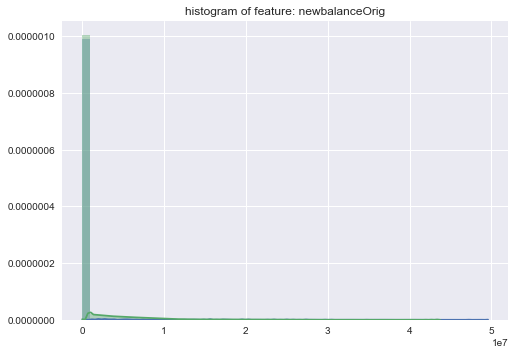

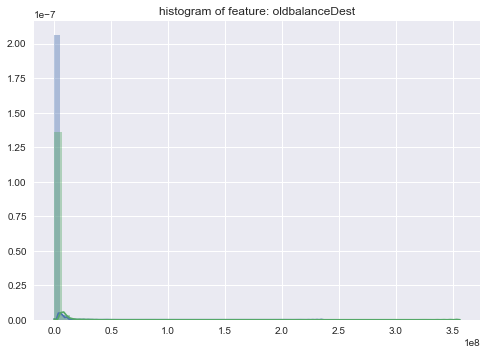

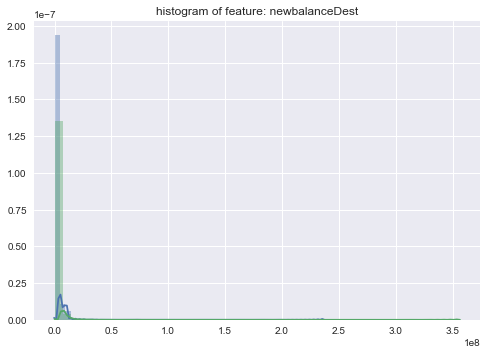

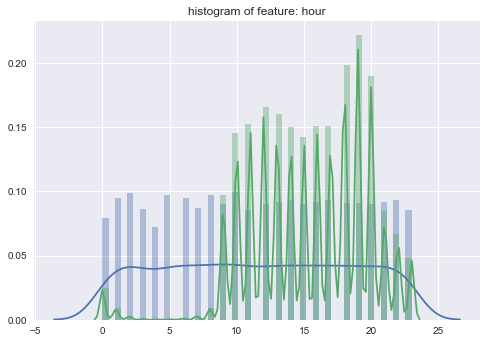

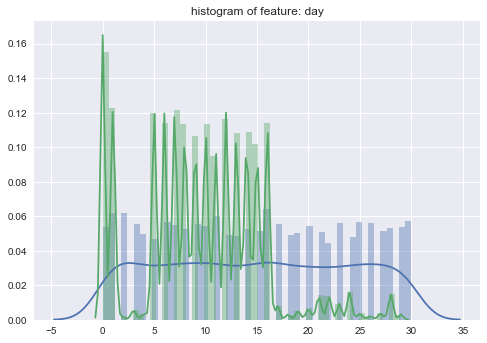

In [48]:
for cl in colplot_features:
    ax = plt.subplot()
    sns.distplot(df[cl][df.isFraud == 1], bins=50)
    sns.distplot(df[cl][df.isFraud == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cl))

    plt.show()

In [52]:
PaymentDF=df.loc[df['type'] == 'PAYMENT']
TransferDF=df.loc[df['type'] == 'TRANSFER']
Cash_outDF=df.loc[df['type'] == 'CASH_OUT']
DebitDF=df.loc[df['type'] == 'DEBIT']
Cash_inDF=df.loc[df['type'] == 'CASH_IN']

In [53]:
Paymentdesc=PaymentDF.describe()
Transferdesc=TransferDF.describe()
Cash_outdesc=Cash_outDF.describe()
Debitdesc=DebitDF.describe()
Cash_indesc=Cash_inDF.describe()

In [54]:
DebitDF.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day
step,1.000000,-0.018849,-0.042570,-0.041513,0.040128,0.036297,NaN,NaN,0.033097,0.999255
amount,-0.018849,1.000000,0.005035,-0.024812,0.012239,0.015525,NaN,NaN,-0.011815,-0.018403
oldbalanceOrg,-0.042570,0.005035,1.000000,0.998719,-0.002306,-0.001466,NaN,NaN,-0.009932,-0.042209
newbalanceOrig,-0.041513,-0.024812,0.998719,1.000000,-0.002804,-0.002062,NaN,NaN,-0.008948,-0.041189
oldbalanceDest,0.040128,0.012239,-0.002306,-0.002804,1.000000,0.998549,NaN,NaN,0.001599,0.040087
newbalanceDest,0.036297,0.015525,-0.001466,-0.002062,0.998549,1.000000,NaN,NaN,0.000322,0.036304
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,0.033097,-0.011815,-0.009932,-0.008948,0.001599,0.000322,NaN,NaN,1.000000,-0.005510
day,0.999255,-0.018403,-0.042209,-0.041189,0.040087,0.036304,NaN,NaN,-0.005510,1.000000


In [54]:
Flagged=df.loc[df['isFlaggedFraud'] == 1]

In [55]:
Flagged

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


Bizonyos oszlopok mint pl amount vagy balance normalizálása segíthet jobb eredményt kapni. Valamint az origin és Dest balance